In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.3f}'.format

In [2]:
avocado = pd.read_csv("dataset/avocado_2015_to_2020.csv")

In [3]:
avocado.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region,Month
0,1.750,27365.890,9307.340,3844.810,615.280,13598.460,13061.100,537.360,0.000,Organic,2015,Southeast,Jan
1,1.490,17723.170,1189.350,15628.270,0.000,905.550,905.550,0.000,0.000,Organic,2015,Chicago,Jan
2,1.680,2896.720,161.680,206.960,0.000,2528.080,2528.080,0.000,0.000,Organic,2015,HarrisburgScranton,Jan
3,1.520,54956.800,3013.040,35456.880,1561.700,14925.180,11264.800,3660.380,0.000,Conventional,2015,Pittsburgh,Jan
4,1.640,1505.120,1.270,1129.500,0.000,374.350,186.670,187.680,0.000,Organic,2015,Boise,Jan


In [4]:
avocado = avocado.rename(columns={"4046": "Small/Medium Hass", "4225": "Large Hass", "4770": "Extra Large Hass"})
avocado = avocado[avocado["Region"] != "TotalUS"]

In [5]:
avocado.head()

,AveragePrice,Total Volume,Small/Medium Hass,Large Hass,Extra Large Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region,Month
0,1.750,27365.890,9307.340,3844.810,615.280,13598.460,13061.100,537.360,0.000,Organic,2015,Southeast,Jan
1,1.490,17723.170,1189.350,15628.270,0.000,905.550,905.550,0.000,0.000,Organic,2015,Chicago,Jan
2,1.680,2896.720,161.680,206.960,0.000,2528.080,2528.080,0.000,0.000,Organic,2015,HarrisburgScranton,Jan
3,1.520,54956.800,3013.040,35456.880,1561.700,14925.180,11264.800,3660.380,0.000,Conventional,2015,Pittsburgh,Jan
4,1.640,1505.120,1.270,1129.500,0.000,374.350,186.670,187.680,0.000,Organic,2015,Boise,Jan


In [6]:
month_order = avocado["Month"].unique()
year_order = avocado["Year"].unique()

In [7]:
average_total_per_year_month_region = avocado.groupby(["Year", "Month", "Region"])\
                        .agg({"AveragePrice": "mean", "Total Volume": "sum"})\
                        .reindex(month_order, level=1)

In [8]:
average_total_per_year_month_region["Total Value (Million $)"] = average_total_per_year_month_region["AveragePrice"] *\
                                                                 average_total_per_year_month_region["Total Volume"] /\
                                                                 1000000

In [9]:
average_total_per_year_month_region = average_total_per_year_month_region.reset_index()

In [10]:
average_total_per_year_month_region.head()

,Year,Month,Region,AveragePrice,Total Volume,Total Value (Million $)
0,2015,Jan,Albany,1.509,176518.010,0.266
1,2015,Jan,Atlanta,1.456,1728319.950,2.517
2,2015,Jan,BaltimoreWashington,1.251,2883524.150,3.608
3,2015,Jan,Boise,1.330,274361.810,0.365
4,2015,Jan,Boston,1.538,1748752.350,2.689


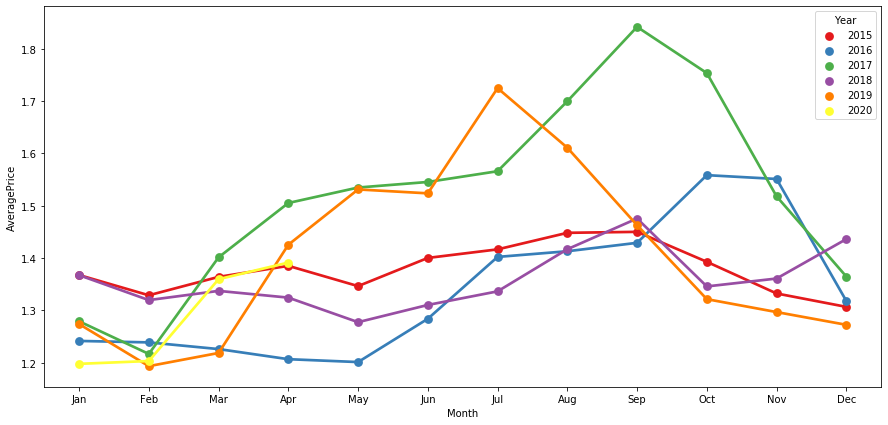

In [11]:
plt.figure(figsize=(15, 7))
sns.pointplot(x= "Month", y= "AveragePrice",hue= "Year", data = average_total_per_year_month_region, 
              palette="Set1", ci= False)
plt.show()

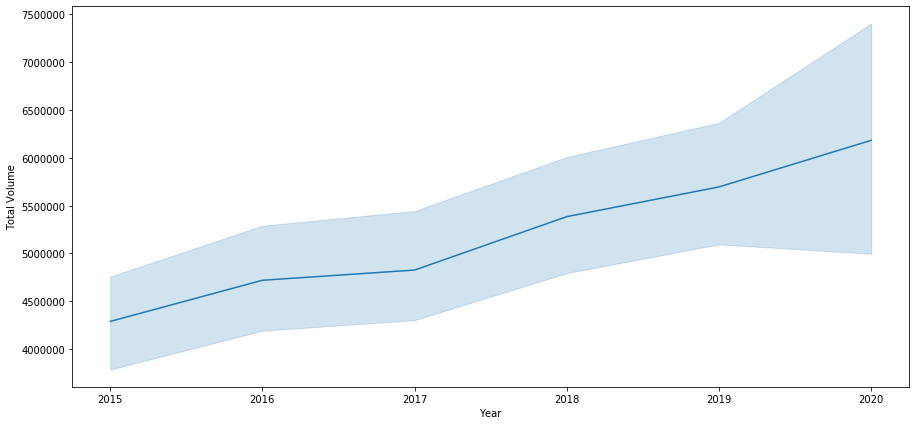

In [20]:
plt.figure(figsize=(15, 7))
sns.lineplot(x= "Year", y= "Total Volume", data = average_total_per_year_month_region, palette="Set1", )
plt.show()